In [1]:
import os
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)

In [2]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/CSV files")

tetragram = "tetragram.csv"
tetragram1 = "tetragram1.csv"
tetragram2 = "tetragram2.csv"

In [3]:
df = pd.read_csv(tetragram).rename(columns={"0": "Stop"})
df1 = pd.read_csv(tetragram1).rename(columns={"0": "Stop"})
df2 = pd.read_csv(tetragram2).rename(columns={"0": "Stop"})
userdf = pd.read_csv('dayStopTetra.csv')

In [4]:
Stops = df['Stop'].value_counts()
Stops1 = df1['Stop'].value_counts()
Stops2 = df2['Stop'].value_counts()

In [5]:
bigram = Stops[0:13].to_dict()
bigram1 = Stops1[0:13].to_dict()
bigram2 = Stops2[0:22].to_dict()

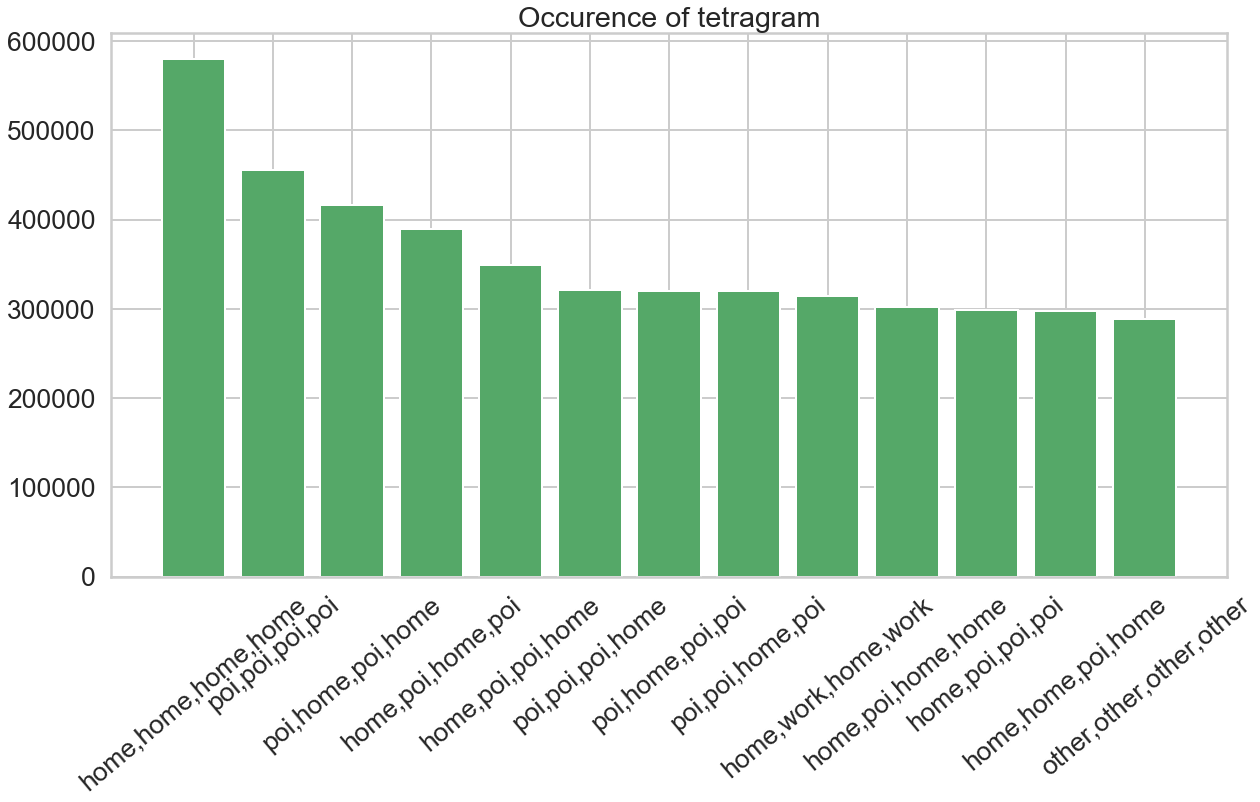

In [6]:
plt.bar(list(bigram), bigram.values(), color='g')
plt.title('Occurence of tetragram')
plt.xticks(rotation=40)
plt.show()

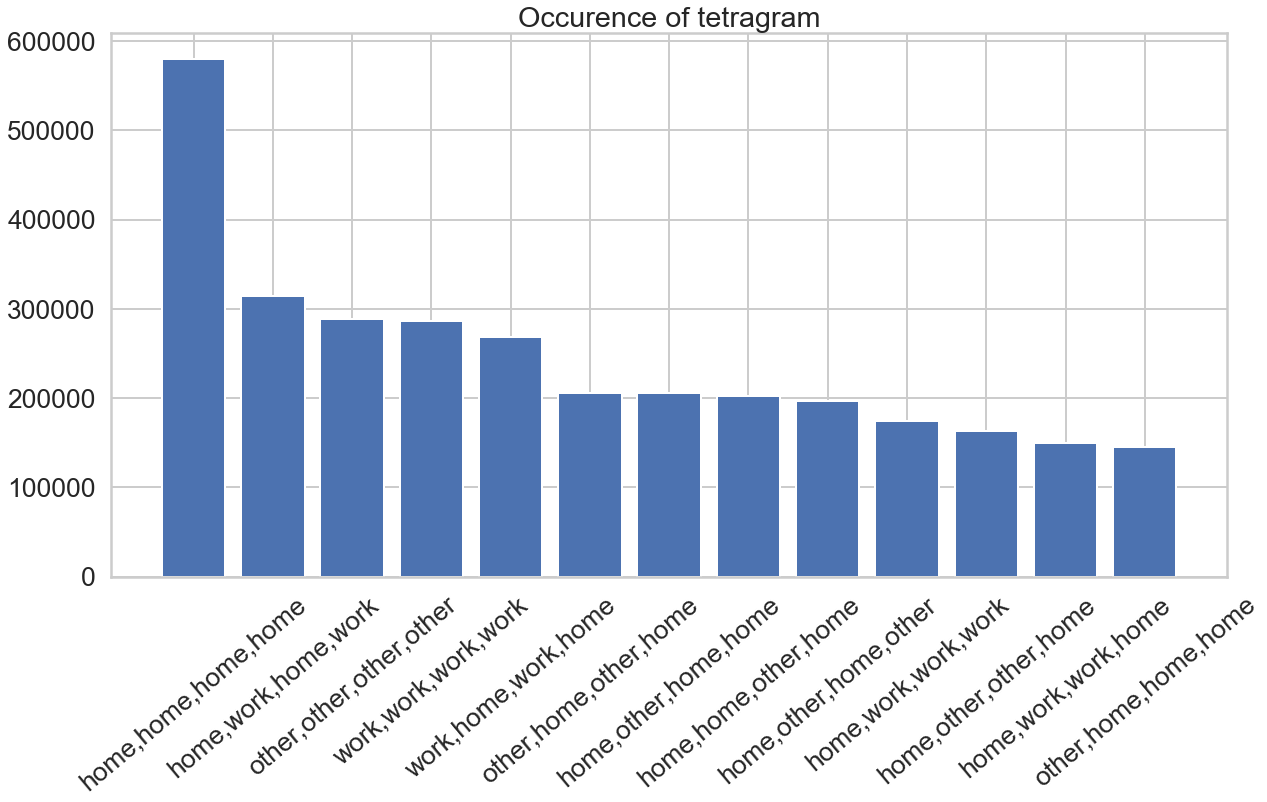

In [7]:
plt.bar(list(bigram1), bigram1.values(), color='b')
plt.title('Occurence of tetragram')
plt.xticks(rotation=40)
plt.show()

In [8]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

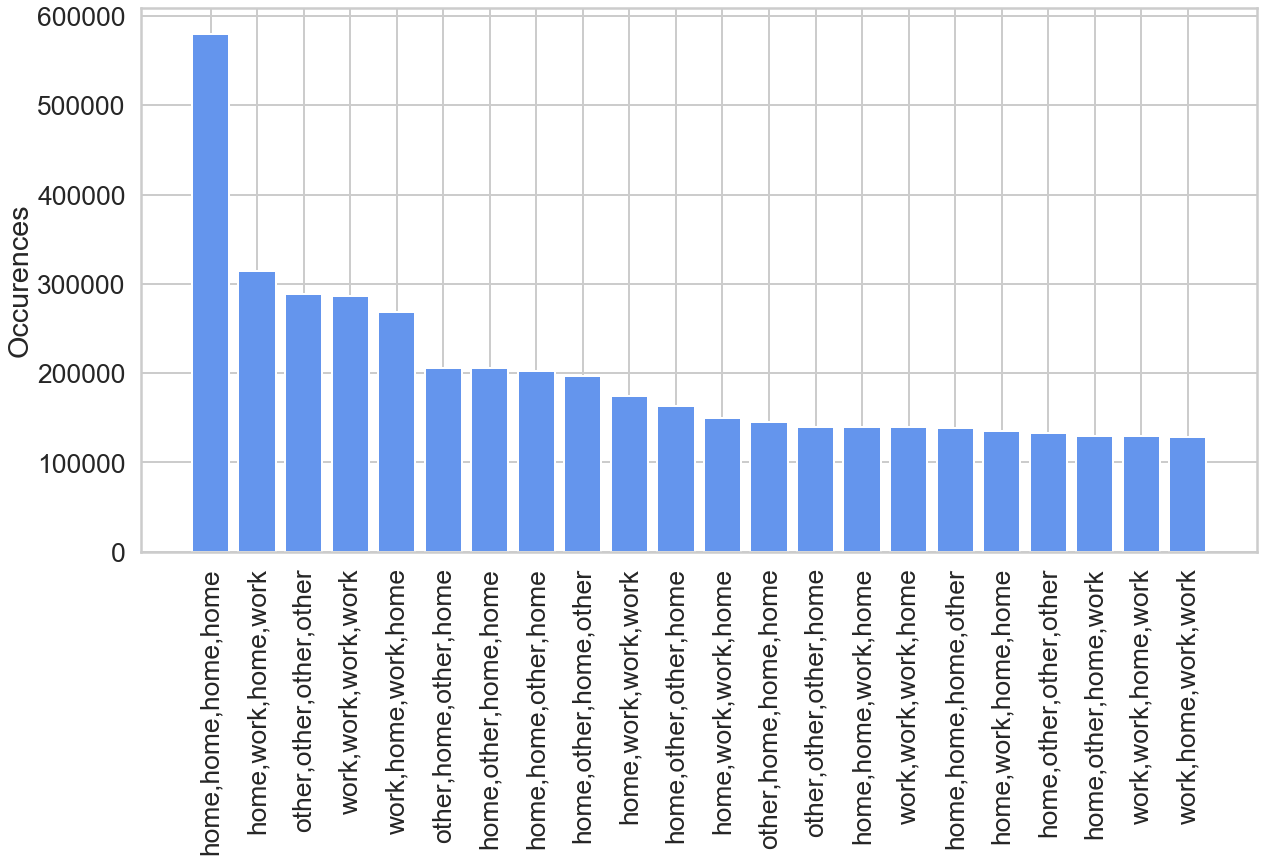

In [9]:
plt.bar(list(bigram2), bigram2.values(), color='cornflowerblue')
plt.xticks(rotation=90)
plt.ylabel('Occurences')
plt.savefig('tetragram.png') #Save plot
plt.show()

In [10]:
bigram2 = Stops2[0:22].to_dict()
bi2 = Stops2[22:60].to_dict()

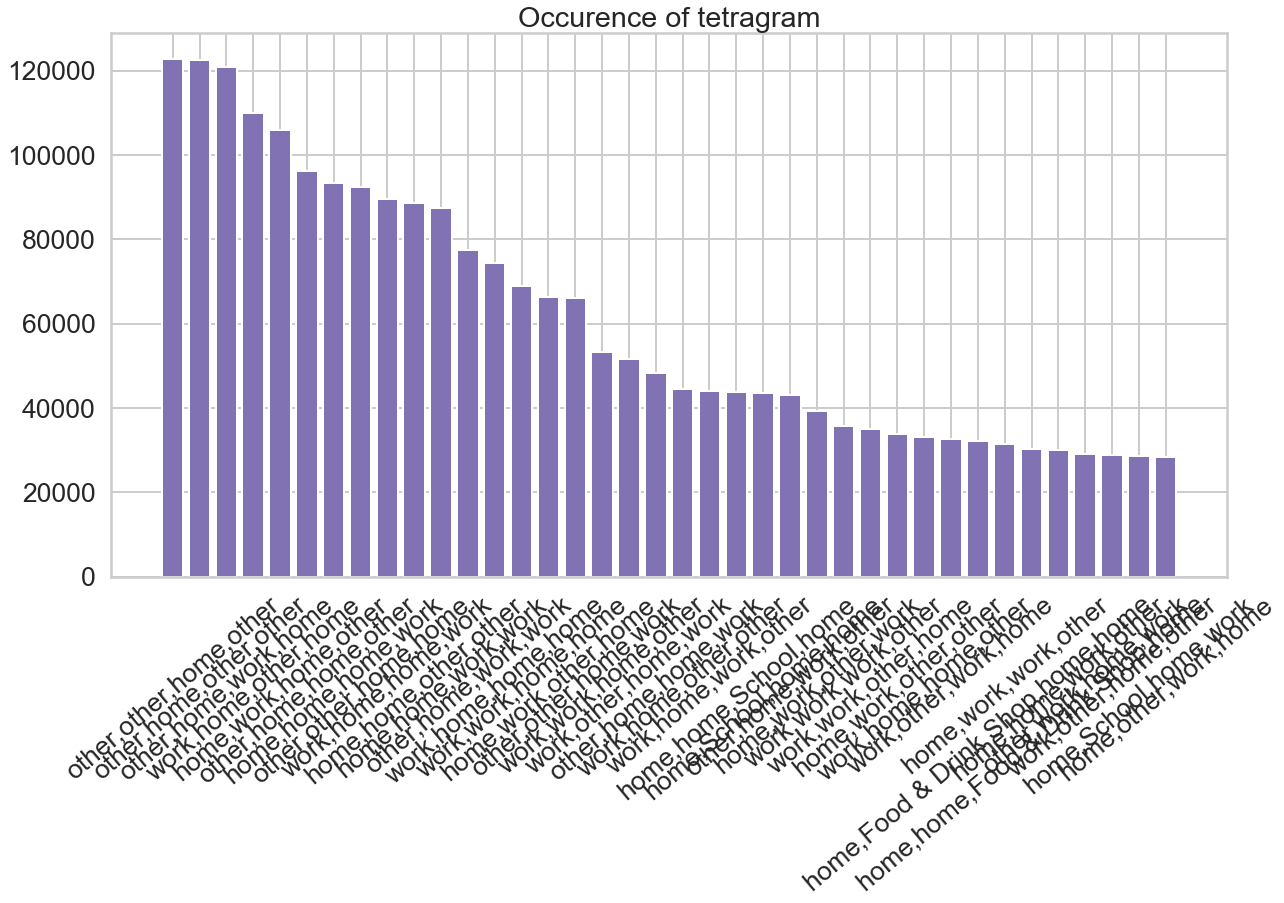

In [11]:
#bar plot from the 23'th to 60'th most frequent
plt.bar(list(bi2), bi2.values(), color='m')
plt.title('Occurence of tetragram')
plt.xticks(rotation=40)
plt.show()

In [12]:
dfStop = pd.DataFrame.from_dict(bigram, orient='index')
df1Stop = pd.DataFrame.from_dict(bigram1, orient='index')
df2Stop = pd.DataFrame.from_dict(bigram2, orient='index')

In [13]:
dfStop = dfStop.rename(columns = {0: 'Occurrence'})
df1Stop = df1Stop.rename(columns = {0: 'Occurrence'})
df2Stop = df2Stop.rename(columns = {0: 'Occurrence'})

In [14]:
#Computes probability of stops
dfStop['Probability'] = dfStop.Occurrence/dfStop.sum()['Occurrence']
df1Stop['Probability'] = df1Stop.Occurrence/df1Stop.sum()['Occurrence']
df2Stop['Probability'] = df2Stop.Occurrence/df2Stop.sum()['Occurrence']

In [15]:
dfStop = dfStop.reset_index().rename(columns = {'index': 'Stop'}).sort_values(by=['Probability'], ascending = False)
df1Stop = df1Stop.reset_index().rename(columns = {'index': 'Stop'}).sort_values(by=['Probability'], ascending = False)
df2Stop = df2Stop.reset_index().rename(columns = {'index': 'Stop'}).sort_values(by=['Probability'], ascending = False)

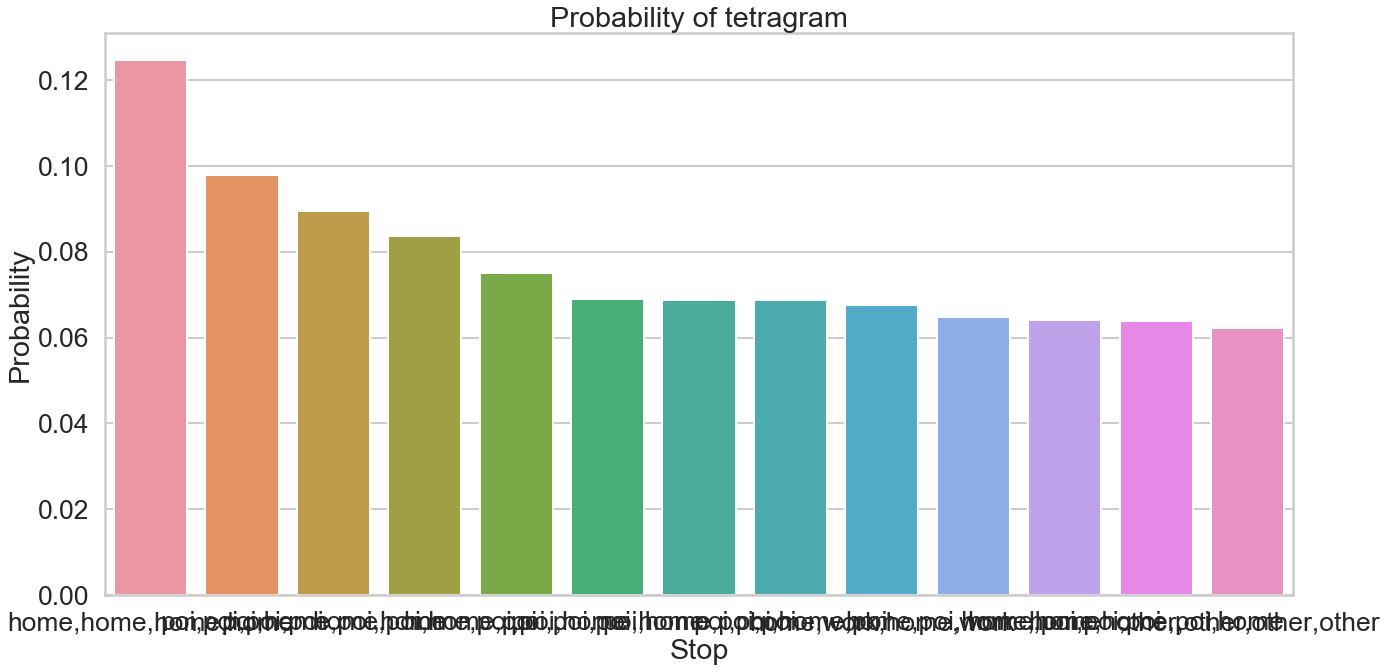

In [16]:
sns.barplot(x = 'Stop', y = 'Probability', data=dfStop).set(title='Probability of tetragram')
plt.tight_layout()

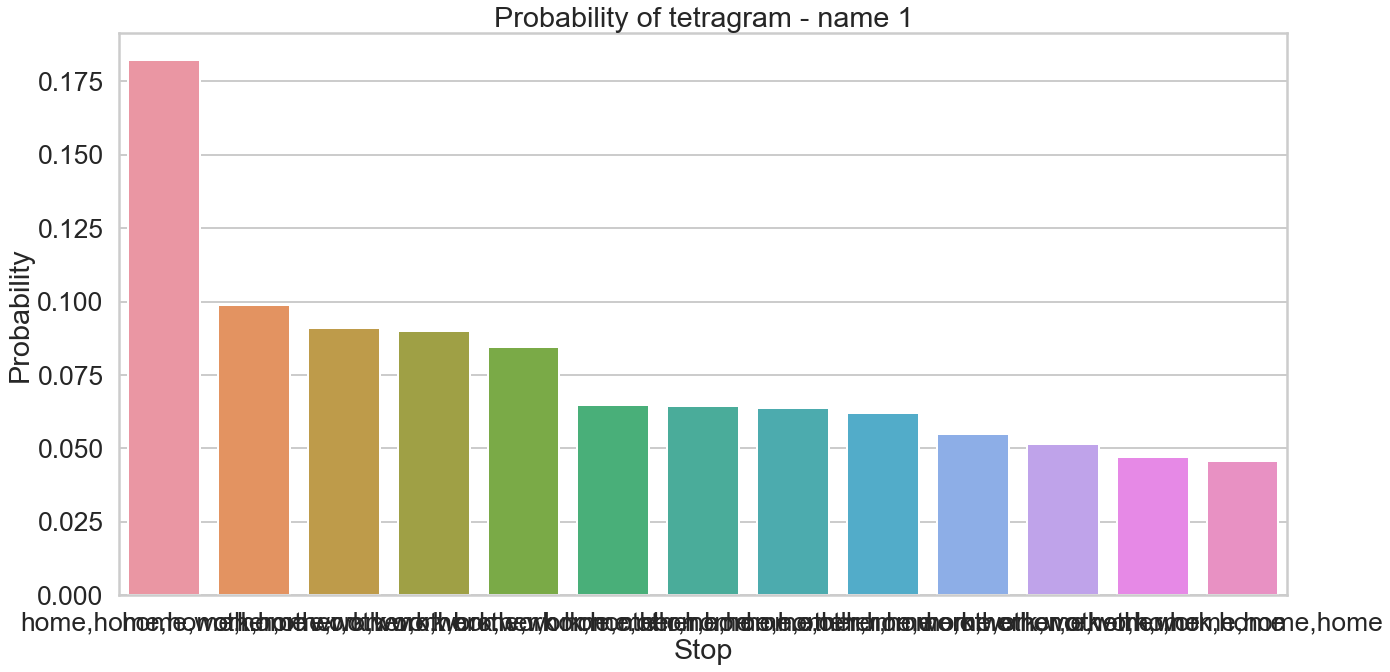

In [17]:
sns.barplot(x = 'Stop', y = 'Probability', data=df1Stop).set(title='Probability of tetragram - name 1')
plt.tight_layout()

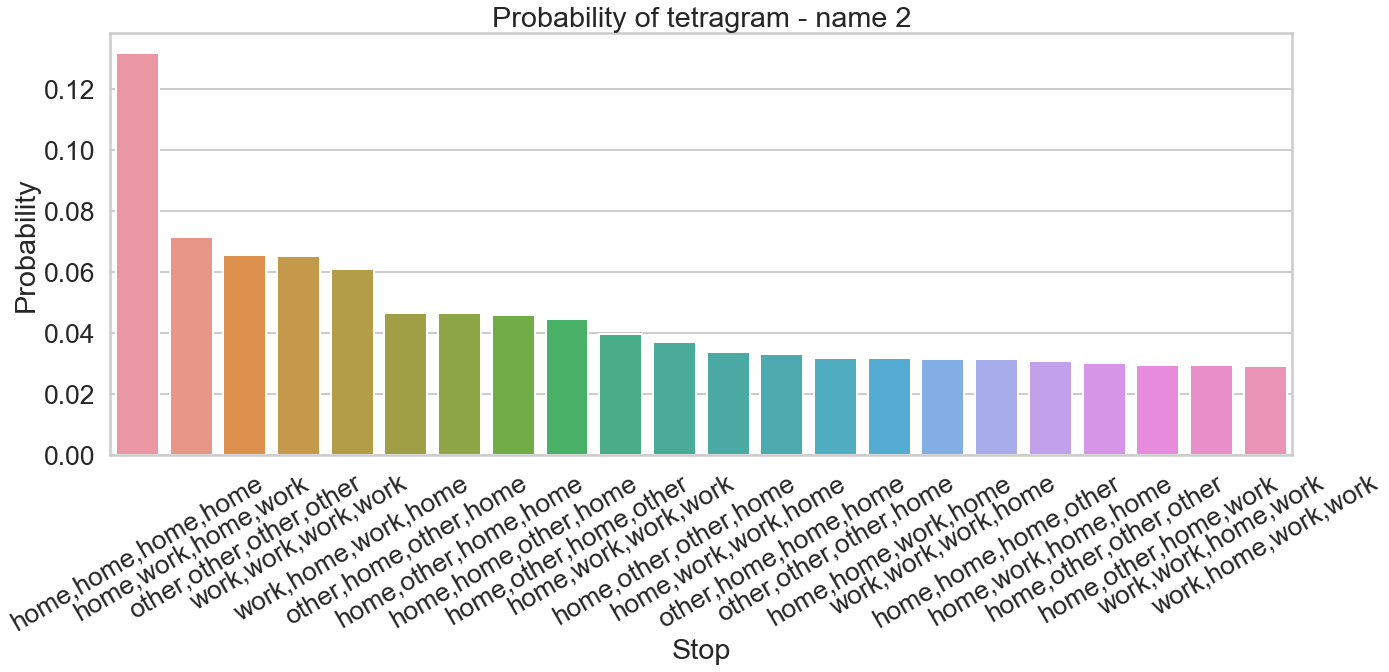

In [18]:
#not percent
sns.barplot(x = 'Stop', y = 'Probability', data=df2Stop).set(title='Probability of tetragram - name 2')
plt.xticks(rotation=30)
plt.tight_layout()

In [19]:
#Occurence of tetragram(for each user and each tetragram)
tetragramOccurence = userdf.groupby(['userId', 'Stop']).size().reset_index().rename(columns={0: "Occurence"})

In [20]:
#count number of tetragrams for each user
tetragramCount = userdf.groupby('userId').count()['Stop'].reset_index().rename(columns={'Stop': 'StopCount'})

In [21]:
tetragramOccurence = pd.merge(tetragramOccurence, tetragramCount, on='userId')

In [22]:
#Occurence/tetragram
tetragramOccurence['Occurence/tetragram'] = tetragramOccurence['Occurence']/tetragramOccurence['StopCount']

In [23]:
#(Below is the 10 most frequent, which is only regarding home and other. Not really interesting.)
tetragramOccurence.groupby(['Stop', 'Occurence/tetragram']).size().reset_index().rename(columns={0: 'Count'}).nlargest(10, 'Count')

,Stop,Occurence/tetragram,Count
4589517,"home,other,other,home",0.010204,185
4589547,"home,other,other,home",0.010526,185
4589894,"home,other,other,home",0.014493,184
4589432,"home,other,other,home",0.009346,183
4589557,"home,other,other,home",0.010638,181
4589811,"home,other,other,home",0.013514,180
4589624,"home,other,other,home",0.011364,179
4589461,"home,other,other,home",0.009615,177
4589739,"home,other,other,home",0.012658,176
4589932,"home,other,other,home",0.014925,174
